<a href="https://colab.research.google.com/github/bertonag/MCS-7103-Gilbert-Nyakana/blob/main/diabetesHealthIndicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MCS 7103: Machine Learning**

**Assignment 1: Exploratory Data Analysis Process**

Based on last week's lecture, your assignment is to perform Exploratory Data Analysis
Process (DAP) on your dataset and write a report that is at least 3 pages long. You can
write as many pages as you need. The report needs to be clear and follow a step-by-step
process.
1. Present your question before and after, then the answers. The answers can be
before the next step (Data Wrangling), every process or after the full process. The
question that helped you select the dataset should differ from the questions you
are using for the rest of the process. I have general questions to guide you
through your analysis.
2. Perform in-depth data wrangling.
3. Provide a well-detailed Exploratory Data Analysis (EDA).
4. Draw some conclusions based on the performed EDA.
5. Communicate the findings in a detailed report.

What do you what to achieve with your dataset?


*   Predict the diabetes basing on lifestyle



Import the libraries that will aid the EDA process

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

**Dataset Assesment**

I have three datasets stored in different csv files that I need to asses.


*   Look at the different features and see if I can merge or concatinate so that I have one file to work with.
*   Do some data cleaning that is check for duplicates and remove them, check for null values and handle them, normalize column names among other processes.
*   Save the merged clean dataset





In [2]:
dataFrame1=pd.read_csv("https://raw.githubusercontent.com/bertonag/MCS-7103-Gilbert-Nyakana/main/diabetes_012_health_indicators_BRFSS2015.csv")
dataFrame2=pd.read_csv("https://raw.githubusercontent.com/bertonag/MCS-7103-Gilbert-Nyakana/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
dataFrame3=pd.read_csv("https://raw.githubusercontent.com/bertonag/MCS-7103-Gilbert-Nyakana/main/diabetes_binary_health_indicators_BRFSS2015.csv")

In [3]:
#Display of records in the first dataset which was stored in dataframe1 variable
dataFrame1

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
#Display of records in the second dataset which was stored in dataframe2 variable
dataFrame2

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [5]:
#Display of records in the third dataset which was stored in dataframe3 variable
dataFrame3

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Datasets have similar features except for dataframe1 that has Diabetes_012 as opposed to Diabetes_binary.

**Action**


*   Rename Diabetes_012 to Diabetes_binary
*   Concatinate the dataframes into one



In [6]:
#Rename dataframe1's Diabetes_012 to Diabetes_binary
dataFrame1.rename(columns={"Diabetes_012": "Diabetes_binary"}, inplace=True)

In [7]:
#Check whether the column has been renamed
print(dataFrame1.columns)


Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


The code below;  

*   Concatinates dataFrame1, dataFrame2 and dataFrame3 into merged_dataframe
*   Removes the duplicates




In [8]:
#Concatinate dataframes
merged_dataframe = pd.concat([dataFrame1,dataFrame2,dataFrame3], axis=0, ignore_index=True)

#Remove duplicates
merged_dataframe = merged_dataframe.drop_duplicates()


In [9]:
#Display the merged_dataframe
merged_dataframe

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577880,0.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,10.0,0.0,0.0,11.0,3.0,1.0
577900,0.0,1.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,0.0,4.0,5.0,4.0
577901,0.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,9.0,6.0,7.0
578036,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,6.0,4.0


**What is the target variable in the dataset?**

Diabetes_binary is the is the Identified target value

**Are there any missing values in the features?**

In [10]:
#This code checks for missing or values
merged_dataframe.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


There are no null values in the dataset.

**How many unique columns does each feature have?**

In [11]:
#code that outputs the number of unique values per feature
merged_dataframe.nunique()

,0
Diabetes_binary,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


**What are these unique values in our target variable?**

In [12]:
#Code that shows the unique values of the Diabetes_binary feature?
merged_dataframe["Diabetes_binary"].unique()

array([0., 2., 1.])

**How are these unique categories in the target variable distributed?**

In [13]:
#code that checks the distribution of the values per category
merged_dataframe["Diabetes_binary"].value_counts()

,count
Diabetes_binary,
0.0,194377
1.0,39657
2.0,35097


Modify target values to have [0, 1] for easy predictions by replacing 2 with 1

In [14]:
merged_dataframe["Diabetes_binary"]=merged_dataframe["Diabetes_binary"].replace({2:1})

In [15]:
#Confirm that the values have been merged
merged_dataframe["Diabetes_binary"].value_counts()


,count
Diabetes_binary,
0.0,194377
1.0,74754


**After replacing the 2 with 1, are there any duplicates?**

In [16]:
#check for duplicated rows in the dataset
merged_dataframe[merged_dataframe.duplicated()]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
31154,1.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
36641,1.0,1.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
37060,1.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
43230,1.0,0.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,4.0,0.0,0.0,9.0,6.0,8.0
44822,1.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324367,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
324368,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
324369,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
324370,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


Duplicates have been found in the dataset and these need to be removed

In [17]:
#Remove the identified duplicates
merged_dataframe= merged_dataframe.drop_duplicates()

In [18]:
#Double check to ensure that the duplicates have been dropped
merged_dataframe[merged_dataframe.duplicated()]


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


Duplicates have been eliminated,
let me check the description of the merged dataset

In [19]:
#Describe the current dataset
merged_dataframe.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,234034.000000,234034.000000,234034.000000,234034.000000,234034.000000,234034.000000,234034.000000,234034.00000,234034.000000,234034.000000,...,234034.000000,234034.00000,234034.000000,234034.000000,234034.000000,234034.000000,234034.000000,234034.000000,234034.000000,234034.000000
mean,0.169450,0.457737,0.445123,0.960006,28.727869,0.466360,0.045070,0.10413,0.731889,0.612415,...,0.945978,0.09367,2.609275,3.531115,4.715473,0.187618,0.438966,8.104199,4.975692,5.877582
std,0.375149,0.498212,0.496980,0.195946,6.799401,0.498868,0.207459,0.30543,0.442976,0.487200,...,0.226062,0.29137,1.065605,7.744930,9.081022,0.390408,0.496262,3.089272,0.995056,2.096647
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.00000,1.000000,1.000000,...,1.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.00000,1.000000,1.000000,...,1.000000,0.00000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


**How correlated are the features in the dataset?**

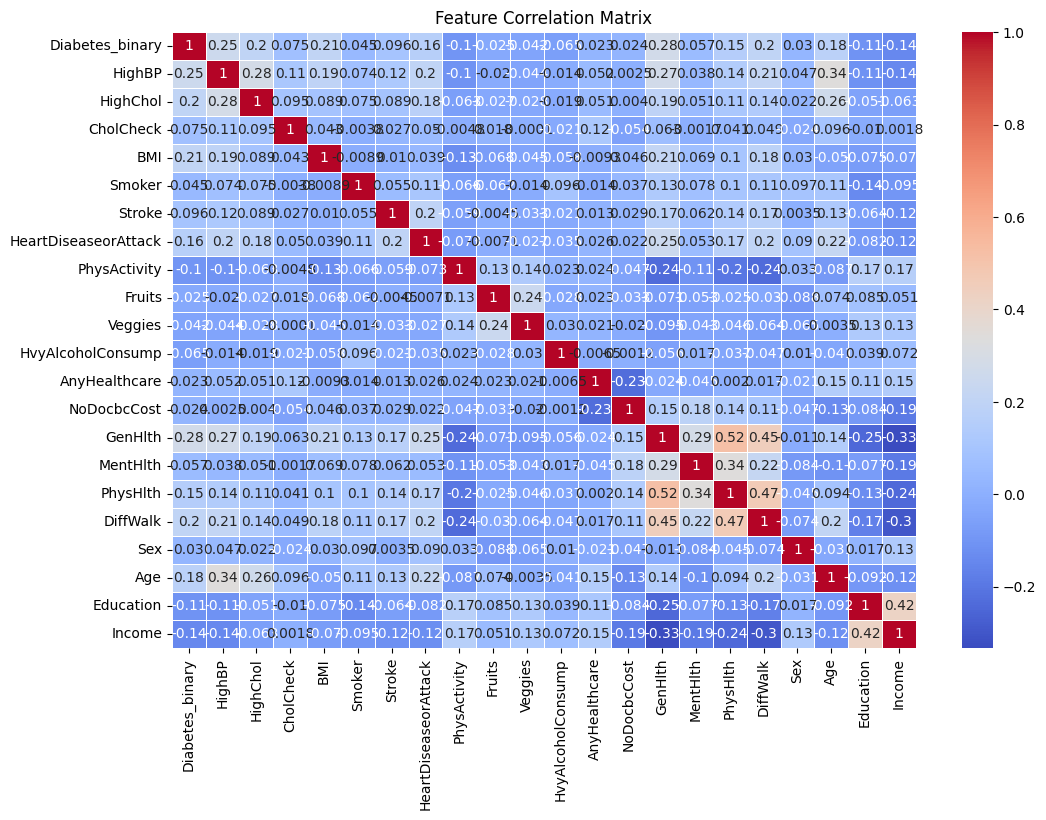

In [32]:
#code to show the correlation of the features
feature_correlation=merged_dataframe.corr()
# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sb.heatmap(feature_correlation, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title("Feature Correlation Matrix")
plt.show()


**Are there outliers in the dataset?**

In [26]:
# Method for outliers detection using scatter plots
def outlierDetectionScatterDiagram(x_column,y_column):
  # Calculate the mean and standard deviation for the columns
  x_mean = merged_dataframe[x_column].mean()
  x_std = merged_dataframe[x_column].std()

  y_mean = merged_dataframe[y_column].mean()
  y_std = merged_dataframe[y_column].std()

  # Define thresholds for outliers (±3 standard deviations)
  x_lower_threshold = x_mean - 3 * x_std
  x_upper_threshold = x_mean + 3 * x_std
  y_lower_threshold = y_mean - 3 * y_std
  y_upper_threshold = y_mean + 3 * y_std

  # Create a scatter plot
  plt.figure(figsize=(10, 6))
  plt.scatter(merged_dataframe[x_column], merged_dataframe[y_column], label='Data Points', color='blue')

  # Mark the outlier boundaries for the scatter plot
  plt.axvline(x_lower_threshold, color='red', linestyle='dashed', label=f'{x_column} lower outlier threshold')
  plt.axvline(x_upper_threshold, color='red', linestyle='dashed', label=f'{x_column} upper outlier threshold')
  plt.axhline(y_lower_threshold, color='green', linestyle='dashed', label=f'{y_column} lower outlier threshold')
  plt.axhline(y_upper_threshold, color='green', linestyle='dashed', label=f'{y_column} upper outlier threshold')

  # Add labels and title
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(f'Scatter Plot with Outlier Detection ({x_column} vs {y_column})')
  plt.legend()
  plt.show()

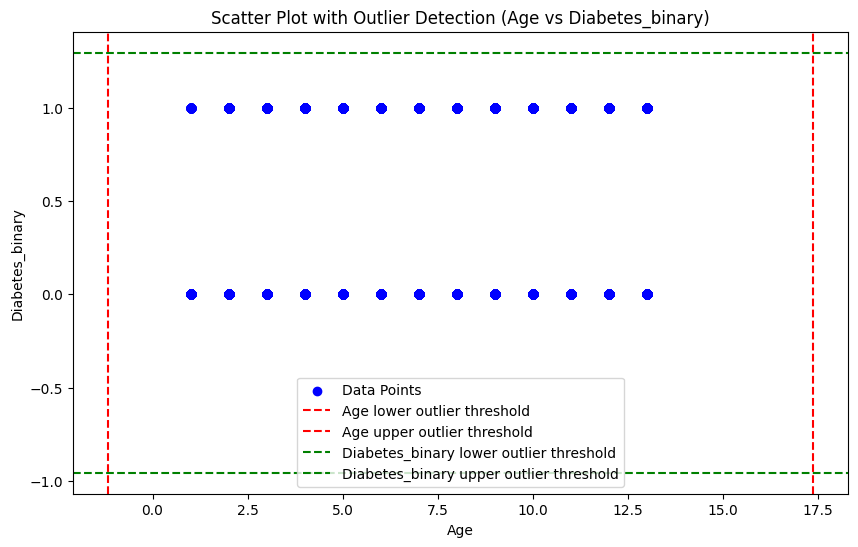

In [28]:
#Check outliers using Age and Diabetes_binary
outlierDetectionScatterDiagram("Age","Diabetes_binary")